In [104]:
# Import necessary Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import sqlite3

In [105]:
# Connect to olist.db database
con = sqlite3.connect("olist.db") 

In [106]:
# Access products of dataset
products_dataset = pd.read_sql("SELECT * FROM olist_products_dataset", con)
products_dataset

,index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...,...
32946,32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [107]:
# Count of missing value on products of dataset
products_dataset.isna().sum()

index                           0
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [108]:
# information of dataset
products_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       32951 non-null  int64  
 1   product_id                  32951 non-null  object 
 2   product_category_name       32341 non-null  object 
 3   product_name_lenght         32341 non-null  float64
 4   product_description_lenght  32341 non-null  float64
 5   product_photos_qty          32341 non-null  float64
 6   product_weight_g            32949 non-null  float64
 7   product_length_cm           32949 non-null  float64
 8   product_height_cm           32949 non-null  float64
 9   product_width_cm            32949 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ MB


In [109]:
#Category data by type
# int64 columns
int_columns = ["index"]

# float64 columns
float_columns = ["product_name_lenght ", "product_description_lenght", "product_photos_qty", "product_weight_g",
"product_length_cm", "product_height_cm", "product_width_cm"]

# categorical columns
obj_columns = ["product_id", "product_name_lenght"]


In [110]:
#Missing Value
# sum all missing value in dataset and keep only columns with missing value > 0
missing = products_dataset.isnull().sum()[products_dataset.isnull().sum() > 0]

# construct a dataframe consists of NaN count and NaN percentage from the dataset
missing_products_dataset = pd.DataFrame({'NaN_count': missing, 'NaN_percentage': missing / len(products_dataset)}).sort_values(by = 'NaN_percentage', ascending = False)

# print the missing value information
missing_products_dataset

,NaN_count,NaN_percentage
product_category_name,610,0.018512
product_name_lenght,610,0.018512
product_description_lenght,610,0.018512
product_photos_qty,610,0.018512
product_weight_g,2,0.000061
product_length_cm,2,0.000061
product_height_cm,2,0.000061
product_width_cm,2,0.000061


In [111]:
#Handling of Missing Value 
# specify columns with legit na values
legit_na_values_columns = ["product_category_name", "product_name_lenght", "product_description_lenght", "product_photos_qty", "product_weight_g", 
                          "product_length_cm", "product_height_cm", "product_width_cm"]

# print how many columns with legit na values
print(f'number of columns with legit NA values: {len(legit_na_values_columns)}')

number of columns with legit NA values: 8


In [112]:
# specify columns with numeric dtype
num_legit_na = [i for i in products_dataset[legit_na_values_columns].columns if products_dataset[i].dtype in ["int", "float"]]

# print how many columns with legit na values (numeric)
print(f'number of numeric columns with legit NA values: {len(num_legit_na)}')

number of numeric columns with legit NA values: 7


In [113]:
# specify columns with categoric dtype
cat_legit_na = [i for i in products_dataset[legit_na_values_columns].columns if products_dataset[i].dtype=="object"]

# print how many columns with legit na values (numeric)
print(f'number of categorical columns with legit NA values: {len(cat_legit_na)}')

number of categorical columns with legit NA values: 1


In [114]:
# copy the initial dataset to backup if any incident happens
products_dataset_handled = products_dataset.copy()

In [115]:
# fill all legit na values in numeric columns with 0

products_dataset_handled[num_legit_na] = products_dataset_handled[num_legit_na].fillna(0)

In [116]:
# check the filling result

products_dataset_handled[num_legit_na].isna().sum()

product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [117]:
#Handling NA values in categoric columns by imputing "not_exist"
# fill legit na values in cat columns with value "not_exist"

products_dataset_handled[cat_legit_na] = products_dataset_handled[cat_legit_na].fillna("not_exist")

In [118]:
# check the filling result

products_dataset_handled[cat_legit_na].isna().sum()

product_category_name    0
dtype: int64

In [119]:
# Merge the handled missing value dataframe with original one
products_dataset_merged = pd.merge(products_dataset, products_dataset_handled, how="right").copy()
products_dataset_merged

,index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...,...
32946,32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [120]:
# information of dataset
products_dataset_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       32951 non-null  int64  
 1   product_id                  32951 non-null  object 
 2   product_category_name       32951 non-null  object 
 3   product_name_lenght         32951 non-null  float64
 4   product_description_lenght  32951 non-null  float64
 5   product_photos_qty          32951 non-null  float64
 6   product_weight_g            32951 non-null  float64
 7   product_length_cm           32951 non-null  float64
 8   product_height_cm           32951 non-null  float64
 9   product_width_cm            32951 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.8+ MB


In [121]:
# Access the order items dataset
items_dataset = pd.read_sql("SELECT * FROM olist_order_items_dataset", con)
items_dataset

,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...,...
112645,112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [122]:
# information of dataset
items_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   index                112650 non-null  int64  
 1   order_id             112650 non-null  object 
 2   order_item_id        112650 non-null  int64  
 3   product_id           112650 non-null  object 
 4   seller_id            112650 non-null  object 
 5   shipping_limit_date  112650 non-null  object 
 6   price                112650 non-null  float64
 7   freight_value        112650 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 6.9+ MB


In [123]:
#Merge product of dataset with items of dataset
product_item=pd.merge(products_dataset_merged,items_dataset, on = 'product_id', how='inner')
product_item

,index_x,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,index_y,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,99413,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39
1,1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,36254,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99
2,2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,852,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82
3,3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,8850,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54
4,4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,59150,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,39539,59e88b7d3675e89aceaf86f372d3bc9a,2,4324dd16853115efb0fd9d0d131ba6f4,2018-01-10 03:32:09,29.90,16.11
112646,32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,48515,6e4465d771f02e4fe335225de3c6c043,1,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28
112647,32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,48516,6e4465d771f02e4fe335225de3c6c043,2,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28
112648,32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,48517,6e4465d771f02e4fe335225de3c6c043,3,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28


In [124]:
# information of dataset
products_dataset_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       32951 non-null  int64  
 1   product_id                  32951 non-null  object 
 2   product_category_name       32951 non-null  object 
 3   product_name_lenght         32951 non-null  float64
 4   product_description_lenght  32951 non-null  float64
 5   product_photos_qty          32951 non-null  float64
 6   product_weight_g            32951 non-null  float64
 7   product_length_cm           32951 non-null  float64
 8   product_height_cm           32951 non-null  float64
 9   product_width_cm            32951 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.8+ MB


In [125]:
# Access the order payments dataset
order_payments_dataset = pd.read_sql("SELECT * FROM olist_order_payments_dataset", con)
order_payments_dataset

,index,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...,...
103881,103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [126]:
# information of dataset
order_payments_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   index                 103886 non-null  int64  
 1   order_id              103886 non-null  object 
 2   payment_sequential    103886 non-null  int64  
 3   payment_type          103886 non-null  object 
 4   payment_installments  103886 non-null  int64  
 5   payment_value         103886 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 4.8+ MB


In [128]:
#Merge product of dataset, items of dataset, and order payments of dataset
product_item_order=pd.merge(product_item,order_payments_dataset, on = 'order_id', how='inner')
product_item_order

,index_x,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,...,order_item_id,seller_id,shipping_limit_date,price,freight_value,index,payment_sequential,payment_type,payment_installments,payment_value
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,...,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,23321,1,debit_card,1,18.30
1,1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,...,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,95507,1,voucher,1,265.99
2,2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,...,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,3465,1,credit_card,1,87.62
3,3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,...,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,97289,1,credit_card,2,121.84
4,4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,...,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,32138,1,credit_card,4,46.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,...,2,4324dd16853115efb0fd9d0d131ba6f4,2018-01-10 03:32:09,29.90,16.11,2747,1,boleto,1,92.02
117597,32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,...,1,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28,7993,1,boleto,1,159.54
117598,32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,...,2,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28,7993,1,boleto,1,159.54
117599,32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,...,3,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28,7993,1,boleto,1,159.54


In [48]:
# information of dataset
product_item_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117601 entries, 0 to 117600
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   index_x                     117601 non-null  int64  
 1   product_id                  117601 non-null  object 
 2   product_category_name       117601 non-null  object 
 3   product_name_lenght         117601 non-null  float64
 4   product_description_lenght  117601 non-null  float64
 5   product_photos_qty          117601 non-null  float64
 6   product_weight_g            117601 non-null  float64
 7   product_length_cm           117601 non-null  float64
 8   product_height_cm           117601 non-null  float64
 9   product_width_cm            117601 non-null  float64
 10  index_y                     117601 non-null  int64  
 11  order_id                    117601 non-null  object 
 12  order_item_id               117601 non-null  int64  
 13  seller_id     

In [129]:
#Categorize datasets by data type
# int64 columns
int_columns = ["index_x","index_y","index","payment_sequential"]

# datetime columns
datetime_columns = ["shipping_limit_date"]

# float64 columns
float_columns = ["product_name_lenght", "product_description_lenght", "product_photos_qty", "product_weight_g",
"product_length_cm", "product_height_cm", "product_width_cm","price","freight_value"]

# categorical columns
obj_columns = ["product_id", "product_category_name", "order_id", "seller_id", "payment_type"]

# target column
target_column = ["payment_value"]

In [130]:
#Detect and Handle Outlier
#Mendeteksi outlier menggunakan Box-Plot
# select only numeric columns
colnames = int_columns+float_columns

# reset index
product_item_order.reset_index(drop=True, inplace=True)

In [131]:
# Minimal subplot rows to make if we want 3 columns
import math
print(math.ceil(len(colnames)/3))

5


/var/folders/03/mzk20zz93y3csbbm6ljnw5780000gn/T/ipykernel_1013/2197521873.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


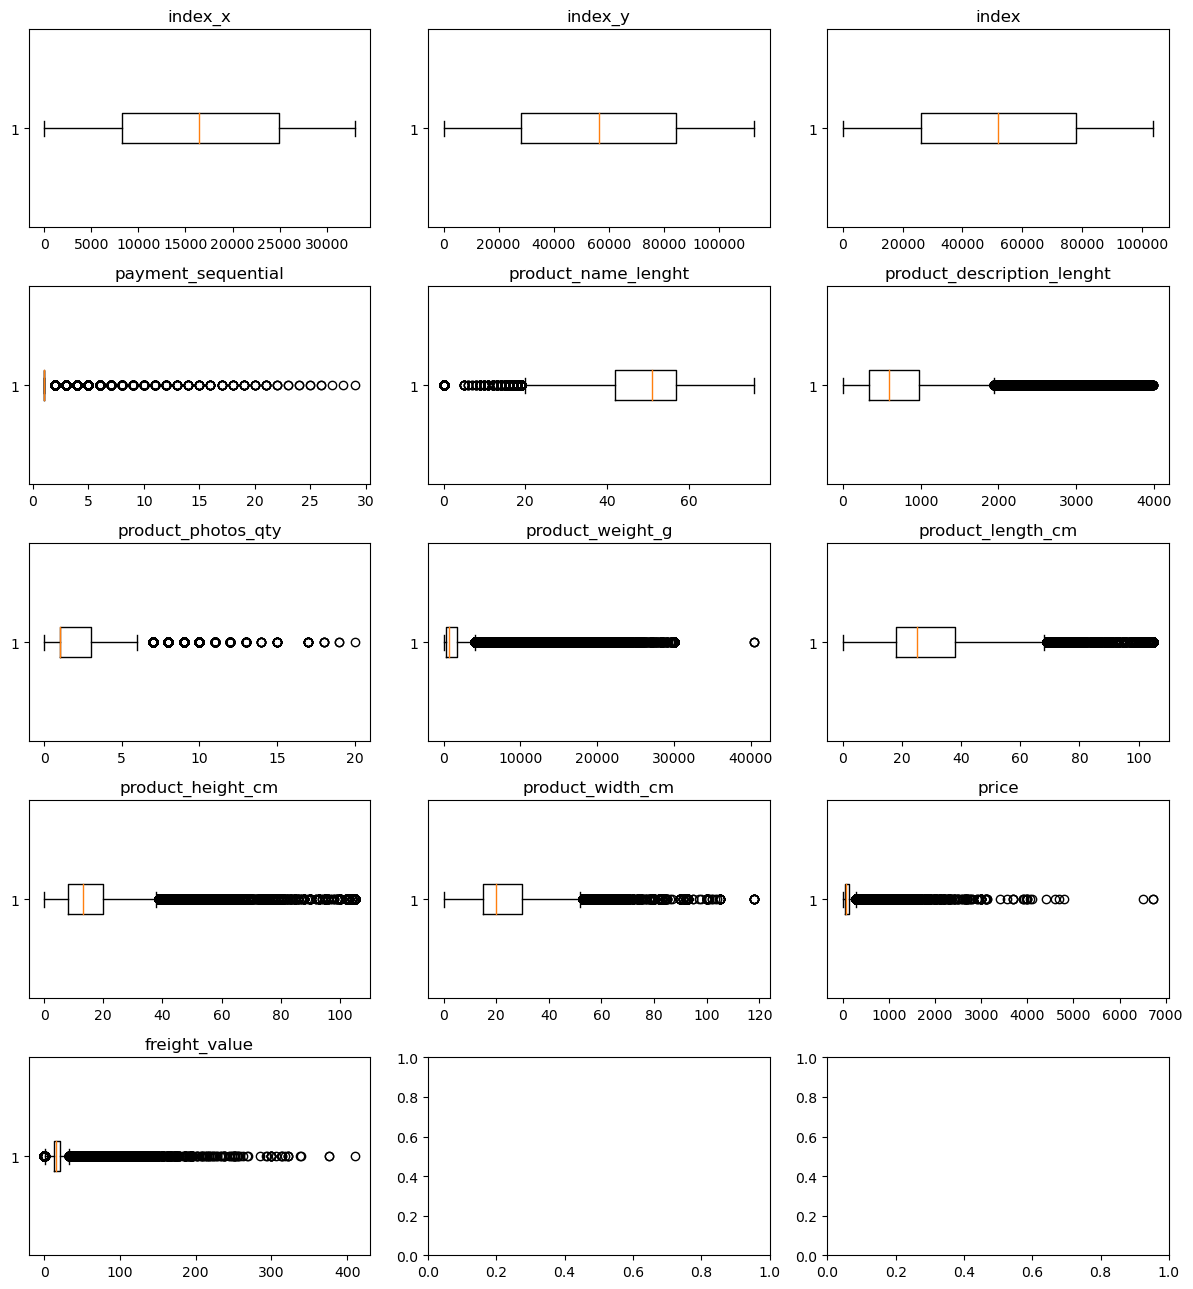

In [132]:
# create subplots with 5x3 grids and size 12x13
fig, ax = plt.subplots(5, 3, figsize=(12,13))

# counter to select colnames
cnt = 0

# loop through the grids
for i in range(5):

    if cnt >= 13:
            break

    for j in range(3):

        if cnt >= 13:
            break
        
        # we use boxplot from pyplot
        ax[i, j].boxplot(product_item_order[colnames[cnt]], vert=False)
        ax[i, j].set_title(str(colnames[cnt]), fontdict={'fontsize':12})

        # increment counter
        cnt = cnt+1

# make sure layout is not overlapping
fig.tight_layout()
# show the graphs
fig.show()

In [133]:
# function to detect outlier using IQR
def detect_outliers_iqr(data):

    # initialize list that contains the outliers
    outliers = []

    # sort data values
    data = sorted(data)

    # compute the q1
    q1 = np.percentile(data, 25)

    # compute the q3
    q3 = np.percentile(data, 75)

    # compute the IQR
    IQR = q3-q1

    # set the lower bound
    ## note that we can play with value 1.5 to widen or narrow the range
    lwr_bound = q1-(1.5*IQR)

    # set the upper bound
    ## note that we can play with value 1.5 to widen or narrow the range
    upr_bound = q3+(1.5*IQR)

    # print computed lower and upper bound of a particular column
    print("lower:",lwr_bound, "upper:", upr_bound)

    # for each data point, decide whether it falls below lower bound or above upper ground
    for i in data:

        if (i<lwr_bound or i>upr_bound):

            outliers.append(i)

    return outliers

In [134]:
# put outlier columns (inferred from boxplot analysis above) in a list
outlier_columns = ["product_name_lenght", "product_width_cm", "product_weight_g", "price", "freight_value"]

In [135]:
for col in outlier_columns:

    outlier = detect_outliers_iqr(product_item_order[col])

    print("number of outliers in column", f"'{str(col)}'", "is", len(outlier))
    print()

lower: 19.5 upper: 79.5
number of outliers in column 'product_name_lenght' is 2500

lower: -7.5 upper: 52.5
number of outliers in column 'product_width_cm' is 2740

lower: -1950.0 upper: 4050.0
number of outliers in column 'product_weight_g' is 16630

lower: -102.6 upper: 277.4
number of outliers in column 'price' is 8844

lower: 0.9149999999999974 upper: 33.355000000000004
number of outliers in column 'freight_value' is 12683



In [56]:
len(outlier_columns)

5

/var/folders/03/mzk20zz93y3csbbm6ljnw5780000gn/T/ipykernel_1013/4067299452.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


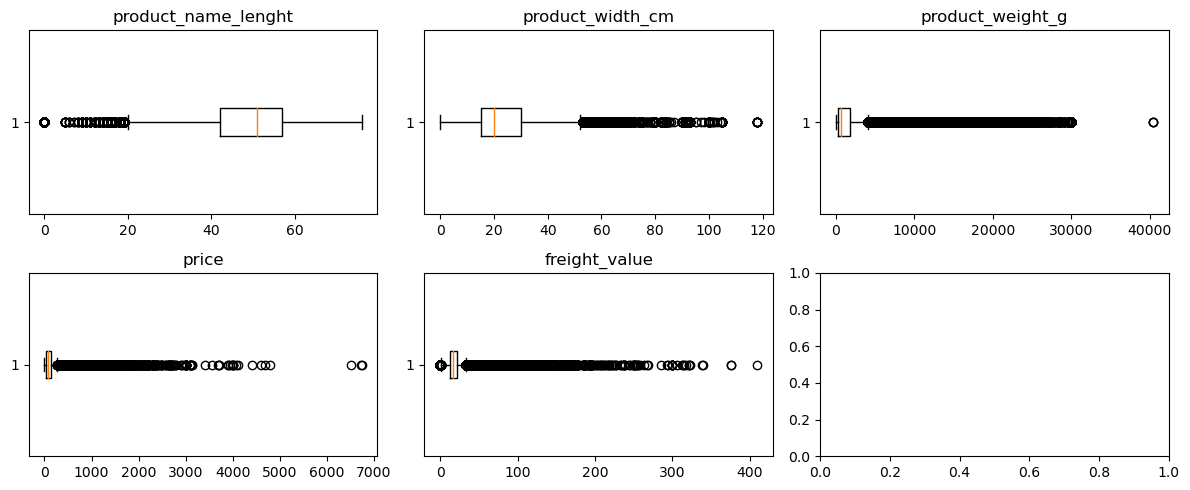

In [136]:
# create subplots with 2x3 grids and size 12x8
fig, ax = plt.subplots(2, 3, figsize=(12,5))

# counter to select outlier_columns
cnt = 0

# loop through the grids
for i in range(2):

    if cnt >= 5:
            break

    for j in range(3):

        if cnt >= 5:
            break
        
        # we use boxplot from pyplot
        ax[i, j].boxplot(product_item_order[outlier_columns[cnt]], vert=False)
        ax[i, j].set_title(str(outlier_columns[cnt]), fontdict={'fontsize':12})

        # increment counter
        cnt = cnt+1

# make sure layout is not overlapping
fig.tight_layout()
# show the graphs
fig.show()

In [137]:
#Handle outlier using capping method
# mengiport method copy
import copy

# Mengcopy data original
product_item_order_capped = copy.deepcopy(product_item_order)

In [138]:
# membuat fungsi untuk filter oulier
def capping_outlier(col):
    
    # Mendefinisikan batas atas dan bawah outlier
    lwr_limit = product_item_order_capped[col].quantile(0.03)
    upr_limit = product_item_order_capped[col].quantile(0.97)

    print(str(col).upper())
    print("lwr:", lwr_limit, "upr:", upr_limit)
    print()
    
    # melakukan filter outlier
    product_item_order_capped[col] = np.where(product_item_order_capped[col]> upr_limit, upr_limit, 
                                        np.where(product_item_order_capped[col]< lwr_limit, lwr_limit, product_item_order_capped[col]))

In [139]:
for col in outlier_columns:

    capping_outlier(col)

PRODUCT_NAME_LENGHT
lwr: 23.0 upr: 60.0

PRODUCT_WIDTH_CM
lwr: 11.0 upr: 50.0

PRODUCT_WEIGHT_G
lwr: 100.0 upr: 12550.0

PRICE
lwr: 13.99 upr: 499.0

FREIGHT_VALUE
lwr: 7.44 upr: 57.35



/var/folders/03/mzk20zz93y3csbbm6ljnw5780000gn/T/ipykernel_1013/47019161.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


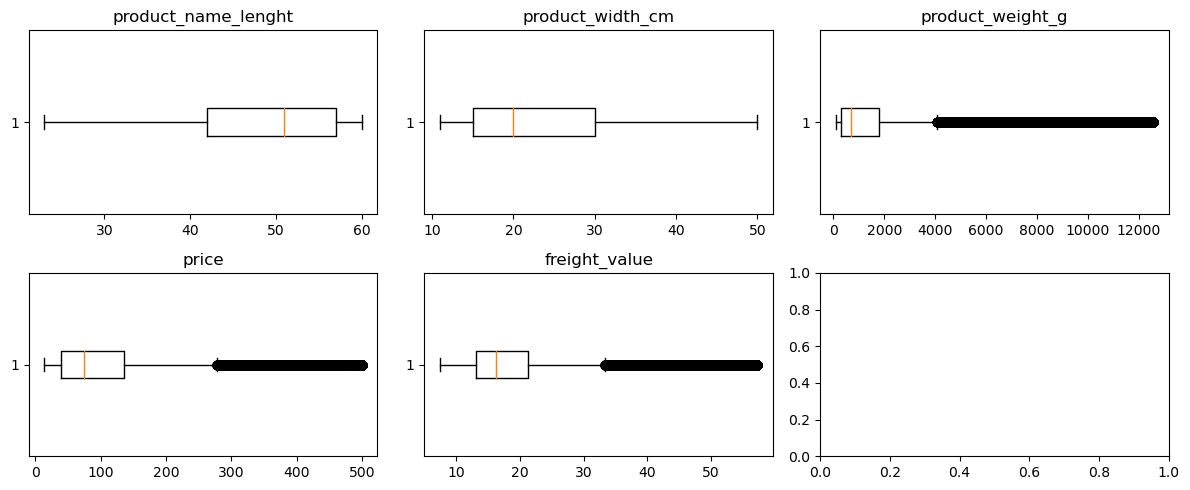

In [140]:
# create subplots with 4x3 grids and size 12x30
fig, ax = plt.subplots(2, 3, figsize=(12,5))

# counter to select outlier_columns
cnt = 0

# loop through the grids
for i in range(2):

    if cnt >= 5:
            break

    for j in range(3):

        if cnt >= 5:
            break
        
        # we use boxplot from pyplot
        ax[i, j].boxplot(product_item_order_capped[outlier_columns[cnt]], vert=False)
        ax[i, j].set_title(str(outlier_columns[cnt]), fontdict={'fontsize':12})

        # increment counter
        cnt = cnt+1

# make sure layout is not overlapping
fig.tight_layout()
# show the graphs
fig.show()

In [141]:
ab=product_item_order[["payment_type", "payment_value"]].groupby("payment_type").agg(['max','min','sum','mean'])
ab

payment_value                                
                       max    min          sum        mean
payment_type                                              
boleto             7274.88  11.62   4059699.60  177.535295
credit_card       13664.08   0.01  15589028.22  179.661264
debit_card         4445.50  13.38    253533.86  149.931319
voucher            1839.05   0.00    405873.03   64.691270

In [142]:
#Ordinal columns: Label Encoding
# look again the ordinal columns
product_item_order.describe().T

,count,mean,std,min,25%,50%,75%,max
index_x,117601.0,16561.642069,9568.556436,0.00,8290.00,16409.00,24977.00,32950.00
product_name_lenght,117601.0,48.063452,11.536509,0.00,42.00,51.00,57.00,76.00
product_description_lenght,117601.0,775.588345,655.066040,0.00,340.00,594.00,979.00,3992.00
product_photos_qty,117601.0,2.176002,1.727270,0.00,1.00,1.00,3.00,20.00
product_weight_g,117601.0,2113.949924,3788.576330,0.00,300.00,700.00,1800.00,40425.00
product_length_cm,117601.0,30.252090,16.194350,0.00,18.00,25.00,38.00,105.00
product_height_cm,117601.0,16.627478,13.459554,0.00,8.00,13.00,20.00,105.00
product_width_cm,117601.0,23.064651,11.751320,0.00,15.00,20.00,30.00,118.00
index_y,117601.0,56283.715002,32533.301480,0.00,28116.00,56248.00,84498.00,112649.00
order_item_id,117601.0,1.195900,0.697706,1.00,1.00,1.00,1.00,21.00


<AxesSubplot:xlabel='price', ylabel='Count'>

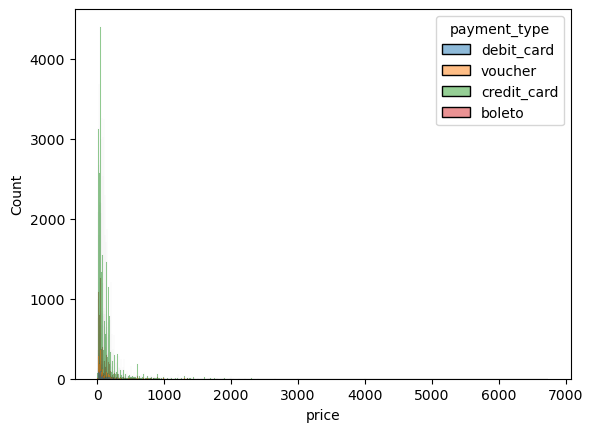

In [23]:
# Histogram payment type
sns.histplot(data=product_item_order, x="price", hue="payment_type")

In [145]:
ab=product_item_order[["product_category_name", "price"]].groupby("product_category_name").agg(['max','min','sum','mean'])
ab

price                              
                               max    min        sum        mean
product_category_name                                           
agro_industria_e_comercio  2990.00  12.99   83841.95  332.706151
alimentos                   274.99   9.99   30119.44   57.261293
alimentos_bebidas           699.90   6.50   16363.53   56.621211
artes                      6499.00   3.50   24721.97  112.885708
artes_e_artesanato          289.49   9.80    1814.01   75.583750
...                            ...    ...        ...         ...
sinalizacao_e_seguranca     740.00   4.50   21584.81  107.387114
tablets_impressao_imagem    889.99  14.90    7840.31   90.118506
telefonia                  2428.00   5.00  339399.16   71.891370
telefonia_fixa             1790.00   6.00   61701.26  227.679926
utilidades_domesticas      6735.00   3.06  666587.00   90.630455

[74 rows x 4 columns]